In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import folium
from folium import plugins
%matplotlib inline

# Importing Data

** TTC Schedule: **
- routes: Data of TTC routes (vehicle - associated lines)
- trips: Data of from where to where the transit is heading
- stops: Which stops associated with the transit
- stop_times: When the vehicle is arriving at particular stop as well as the frequency of the transit
- shapes: shapes of the route

**Passenger Analysis Data:**
- ridership_analysis: Complete data of who, which transit, and when the passengers taking the transit from 1985 to 2017
- ranking_2016: Transit stops ranking based on ridership in 2016
- non_peak_passengers: Summary of ridership during non-peak time from 2004 to 2017
- peak_passengers: Summary of ridership during peak hours from 2004 to 2017
- average_weekday_ridership : Summary of ridership during weekdays from 2016 to parts of 2018
- average_monthly_ridership : Summary of monthly ridership from 2016 to parts of 2018

**Delay Data: **
- subway_delay_14_to_17: Logs for all reported delay for TTC from 2014 to 2017, complete with cause of incident, when the delay is, how long the delay is, and which stop
- subway_delay: Summary of subway delay from January to November 2018
- streetcar_delay: Summary of streetcar delay from January to November 2018
- bus_delay: Summary of bus delay from January to November 2018

In [74]:
routes = pd.read_csv('./OpenData_TTC_Schedules/routes.txt', low_memory=False)
trips = pd.read_csv('./OpenData_TTC_Schedules/trips.txt', low_memory=False)
stops = pd.read_csv('./OpenData_TTC_Schedules/stops.txt', low_memory=False)
stop_times = pd.read_csv('./OpenData_TTC_Schedules/stop_times.txt', low_memory=False)
shapes = pd.read_csv('./OpenData_TTC_Schedules/shapes.txt', low_memory=False)

ridership_analysis = pd.read_excel('./data/1985-2017 Analysis of ridership.xlsx')
ranking_2016 = pd.read_excel('./data/Ranking surface routes 2016 Open Data Toronto.xlsx')
non_peak_passengers = pd.read_csv('./data/TTC Annual Passenger Rides Non-Peak (000s).csv', low_memory=False)
peak_passengers = pd.read_csv('./data/TTC Annual Passenger Rides Peak (000s).csv', low_memory=False)
average_weekday_ridership = pd.read_csv('./data/TTC Average Weekday Ridership.csv', low_memory=False)
monthly_ridership = pd.read_csv('./data/TTC Monthly Ridership.csv', low_memory=False)

subway_delay_14_to_17 = pd.read_csv('./data/Subway & SRT Logs (Jan01_14 to April30_17).csv', low_memory=False)
subway_delay = pd.read_csv('./data/2018_delay_subway.csv', low_memory=False)
streetcar_delay = pd.read_csv('./data/2018_delay_streetcar.csv', low_memory=False)
bus_delay = pd.read_csv('./data/2018_delay_bus.csv', low_memory=False)

# Shapes

Below is the list of how many `(rows, columns)` each dataset is

In [3]:
print("This shape of routes:", routes.shape)
print("This shape of trips:", trips.shape)
print("This shape of stops:", stops.shape)
print("This shape of stop_times:", stop_times.shape)
print("This shape of shapes:", shapes.shape)

print("This shape of ridership_analysis:", ridership_analysis.shape)
print("This shape of ranking_2016:", ranking_2016.shape)
print("This shape of non_peak_passengers:", non_peak_passengers.shape)
print("This shape of peak_passengers:", peak_passengers.shape)
print("This shape of average_weekday_ridership:", average_weekday_ridership.shape)
print("This shape of monthly_ridership:", monthly_ridership.shape)

print("This shape of subway_delay_14_to_17:", subway_delay_14_to_17.shape)
print("This shape of subway_delay:", subway_delay.shape)
print("This shape of streetcar_delay:", streetcar_delay.shape)
print("This shape of bus_delay:", bus_delay.shape)

This shape of routes: (209, 9)
This shape of trips: (104633, 9)
This shape of stops: (10649, 11)
This shape of stop_times: (4329783, 9)
This shape of shapes: (373464, 5)
This shape of ridership_analysis: (54, 34)
This shape of ranking_2016: (217, 5)
This shape of non_peak_passengers: (1, 14)
This shape of peak_passengers: (1, 14)
This shape of average_weekday_ridership: (3, 13)
This shape of monthly_ridership: (4, 13)
This shape of subway_delay_14_to_17: (69016, 10)
This shape of subway_delay: (11, 2)
This shape of streetcar_delay: (11, 2)
This shape of bus_delay: (11, 2)


## FACTS: Here is data of TTC Fare over the years

What a big jump, eh?

Text(0.5,1,'TTC Fare from 1921 - 2016')

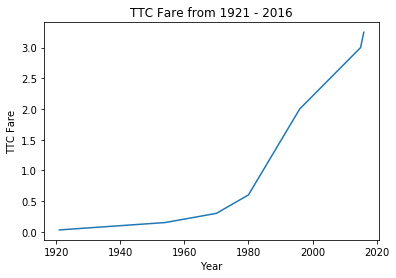

In [97]:
year = [1921, 1954, 1970, 1980, 1996, 2015, 2016]
fare = [0.03, 0.15, 0.30, 0.60, 2, 3, 3.25]
plt.plot(year, fare)
plt.xlabel("Year")
plt.ylabel("TTC Fare")
plt.title("TTC Fare from 1921 - 2016")

# Data Cleanup

## Routes
Dropping unecessary columns: *'agency_id', 'route_desc', 'route_url', 'route_color', 'route_text_color'*

In [4]:
# drop columns from dataset
routes = routes.drop(['agency_id', 'route_desc', 'route_url', 'route_color', 'route_text_color'], axis = 1)

# preview the cleanup dataset
routes.head()

route_id  route_short_name            route_long_name  route_type
0     55518                 1  LINE 1 (YONGE-UNIVERSITY)           1
1     55309                10                  VAN HORNE           3
2     55310               100            FLEMINGDON PARK           3
3     55311               101             DOWNSVIEW PARK           3
4     55312               102                MARKHAM RD.           3

## Trips
Dropping unecessary columns: *'service_id', 'trip_short_name', 'direction_id', 'block_id', 'shape_id'*

In [5]:
# drop columns from dataset
trips = trips.drop(['service_id', 'trip_short_name', 'direction_id', 'block_id', 'shape_id'], axis = 1)

# preview the cleanup dataset
trips.head()

route_id   trip_id                               trip_headsign  \
0     55309  37075813  EAST - 10 VAN HORNE TOWARDS VICTORIA PARK    
1     55309  37075794  EAST - 10 VAN HORNE TOWARDS VICTORIA PARK    
2     55309  37075821  EAST - 10 VAN HORNE TOWARDS VICTORIA PARK    
3     55309  37075797  EAST - 10 VAN HORNE TOWARDS VICTORIA PARK    
4     55309  37075791  EAST - 10 VAN HORNE TOWARDS VICTORIA PARK    

   wheelchair_accessible  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1

## Stops
Dropping Unecessary columns: *'zone_id', 'stop_url', 'location_type', 'parent_station', 'wheelchair_boarding', 'stop_desc'*

In [6]:
# drop columns from dataset
stops = stops.drop(['zone_id', 'stop_url', 'location_type', 'parent_station', 'wheelchair_boarding', 'stop_desc'], axis = 1)

# preview the cleanup dataset
stops.head()

stop_id stop_code                       stop_name   stop_lat   stop_lon
0      262       662       DANFORTH RD AT KENNEDY RD  43.714395 -79.260962
1      263       929      DAVENPORT RD AT BEDFORD RD  43.674448 -79.399696
2      264       940       DAVENPORT RD AT DUPONT ST  43.675540 -79.401960
3      265      1871  DAVISVILLE AVE AT CLEVELAND ST  43.702096 -79.378146
4      266     11700          DISCO RD AT ATTWELL DR  43.701331 -79.594777

## Stop Times
Dropping unecessary columns: *'stop_headsign', 'pickup_type', 'drop_off_type', 'shape_dist_traveled'*

In [7]:
# drop columns from dataset
stop_times = stop_times.drop(['stop_headsign', 'pickup_type', 'drop_off_type', 'shape_dist_traveled'], axis = 1)

# preview the cleanup dataset
stop_times.head()

trip_id arrival_time departure_time  stop_id  stop_sequence
0  37075791      6:15:00        6:15:00    13173              1
1  37075791      6:15:22        6:15:22    14155              2
2  37075791      6:16:11        6:16:11     3807              3
3  37075791      6:17:33        6:17:33     6904              4
4  37075791      6:18:48        6:18:48     1163              5

# Merge Data
Merging following dataset into one dataset: `routes`, `trips`, `stop_times`, and `stops`

In [9]:
# Merge routes with trips on route_id
route_trip = pd.merge(routes, trips, on='route_id')

In [10]:
# Merge routes + trips with stop_times on trip_id
route_trip_stop_times = pd.merge(route_trip, stop_times, on = 'trip_id')

In [11]:
# Merge routes + trips + stop_times on stop_id
route_trip_stop = pd.merge(route_trip_stop_times, stops, on = 'stop_id')

In [12]:
# Preview the first 5 data
route_trip_stop.head()

route_id  route_short_name            route_long_name  route_type  \
0     55518                 1  LINE 1 (YONGE-UNIVERSITY)           1   
1     55518                 1  LINE 1 (YONGE-UNIVERSITY)           1   
2     55518                 1  LINE 1 (YONGE-UNIVERSITY)           1   
3     55518                 1  LINE 1 (YONGE-UNIVERSITY)           1   
4     55518                 1  LINE 1 (YONGE-UNIVERSITY)           1   

    trip_id                                      trip_headsign  \
0  37181522  LINE 1 (YONGE-UNIVERSITY) TOWARDS VAUGHAN METR...   
1  37181510  LINE 1 (YONGE-UNIVERSITY) TOWARDS VAUGHAN METR...   
2  37181426  LINE 1 (YONGE-UNIVERSITY) TOWARDS VAUGHAN METR...   
3  37181427  LINE 1 (YONGE-UNIVERSITY) TOWARDS VAUGHAN METR...   
4  37181428  LINE 1 (YONGE-UNIVERSITY) TOWARDS VAUGHAN METR...   

   wheelchair_accessible arrival_time departure_time  stop_id  stop_sequence  \
0                      1      5:31:21        5:31:21    14404              1   
1                      1      5:36:03        5:36:03    14404              1   
2                      1      5:40:45        5:40:45    14404              1   
3                      1      5:45:27        5:45:27    14404              1   
4                      1      5:50:09        5:50:09    14404              1   

  stop_code                            stop_name   stop_lat   stop_lon  
0     14111  FINCH STATION - SOUTHBOUND PLATFORM  43.780847 -79.415291  
1     14111  FINCH STATION - SOUTHBOUND PLATFORM  43.780847 -79.415291  
2     14111  FINCH STATION - SOUTHBOUND PLATFORM  43.780847 -79.415291  
3     14111  FINCH STATION - SOUTHBOUND PLATFORM  43.780847 -79.415291  
4     14111  FINCH STATION - SOUTHBOUND PLATFORM  43.780847 -79.415291

In [13]:
# Final shape of the merged data
route_trip_stop.shape

(4329783, 15)

# TTC Stop and Routes
Plot scatter plot of all listed stops and routes

`Note`: *Does the shape look familiar?*

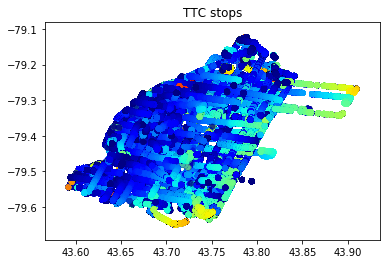

In [15]:
xs = route_trip_stop["stop_lat"]
ys = route_trip_stop["stop_lon"]
sz = route_trip_stop["stop_sequence"]
cm = plt.get_cmap('jet')
plt.title("TTC stops")
plt.scatter(xs, ys, c = sz, cmap = cm, alpha=0.3, edgecolors='None')

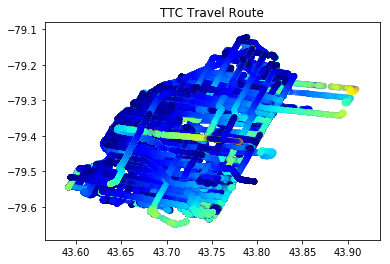

In [16]:
xs = shapes["shape_pt_lat"]
ys = shapes["shape_pt_lon"]
sz = shapes["shape_dist_traveled"]
cm = plt.get_cmap('jet')
plt.title("TTC Travel Route")
plt.scatter(xs, ys, c = sz, cmap = cm, alpha=0.3, edgecolors='None')

# TTC Routes Analysis

Analyze the merged data and finding TTC transit that operating the most


## Top 20 TTC Routes

- Group by dataset by the route name
- Sort by the one that has the most count
- Take top 20 of the grouped by + sorted data

In [19]:
# Group by the dataset by the route name
top20 = route_trip_stop.groupby(['route_long_name']).count()

# Sort Values count (also, reset index!)
top20 = pd.DataFrame(top20).sort_values(by = "trip_id", ascending = False)
top20 = pd.DataFrame(top20).reset_index()

# Let's take the top 20 routes
top20 = top20.head(20)

In [20]:
# Preview the data
top20

route_long_name  route_id  route_short_name  route_type  \
0                       QUEEN    139890            139890      139890   
1               LAWRENCE WEST    115070            115070      115070   
2                        KING     98588             98588       98588   
3               EGLINTON WEST     91762             91762       91762   
4               LAWRENCE EAST     90834             90834       90834   
5                  FINCH WEST     90133             90133       90133   
6                    BATHURST     87326             87326       87326   
7                STEELES EAST     86618             86618       86618   
8               SHEPPARD EAST     79718             79718       79718   
9                     CARLTON     77025             77025       77025   
10                     DUNDAS     75046             75046       75046   
11               STEELES WEST     70627             70627       70627   
12                MORNINGSIDE     70386             70386       70386   
13              EGLINTON EAST     70205             70205       70205   
14                   DUFFERIN     69864             69864       69864   
15                 YORK MILLS     69525             69525       69525   
16                 FINCH EAST     69074             69074       69074   
17                     WILSON     65501             65501       65501   
18                       JANE     65044             65044       65044   
19  LINE 1 (YONGE-UNIVERSITY)     64435             64435       64435   

    trip_id  trip_headsign  wheelchair_accessible  arrival_time  \
0    139890         139890                 139890        139890   
1    115070         115070                 115070        115070   
2     98588          98588                  98588         98588   
3     91762          91762                  91762         91762   
4     90834          90834                  90834         90834   
5     90133          90133                  90133         90133   
6     87326          87326                  87326         87326   
7     86618          86618                  86618         86618   
8     79718          79718                  79718         79718   
9     77025          77025                  77025         77025   
10    75046          75046                  75046         75046   
11    70627          70627                  70627         70627   
12    70386          70386                  70386         70386   
13    70205          70205                  70205         70205   
14    69864          69864                  69864         69864   
15    69525          69525                  69525         69525   
16    69074          69074                  69074         69074   
17    65501          65501                  65501         65501   
18    65044          65044                  65044         65044   
19    64435          64435                  64435         64435   

    departure_time  stop_id  stop_sequence  stop_code  stop_name  stop_lat  \
0           139890   139890         139890     139890     139890    139890   
1           115070   115070         115070     115070     115070    115070   
2            98588    98588          98588      98588      98588     98588   
3            91762    91762          91762      91762      91762     91762   
4            90834    90834          90834      90834      90834     90834   
5            90133    90133          90133      90133      90133     90133   
6            87326    87326          87326      87326      87326     87326   
7            86618    86618          86618      86618      86618     86618   
8            79718    79718          79718      79718      79718     79718   
9            77025    77025          77025      77025      77025     77025   
10           75046    75046          75046      75046      75046     75046   
11           70627    70627          70627      70627      70627     70627   
12           70386    70386          70386      70386     

## Bar Plot Top 20 Routes

Breaking down and compare how much different each route

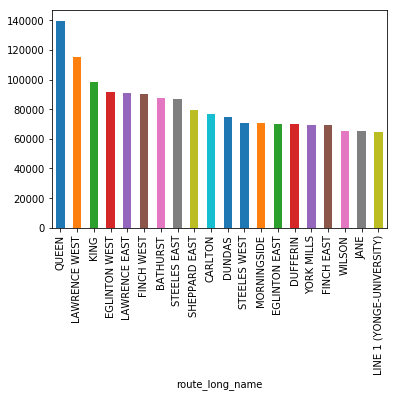

In [22]:
top20.plot.bar(x = 'route_long_name', y = 'route_id', legend = False)

## Scatter Plot Top 20 Routes Location


Since our modified dataset has only count, we have to remodify the data

- Group by the original merged dataset by its `stop latitude` and `stop longitude`
- Sort Values
- Take top 20 data
- Plot data (the bigger the size the more TTC running in that particular route)

`Note`: *Again, do you see any similar shape on the plotted dots*

In [23]:
# Group by the original merged dataset by its stop_lat and stop_lon
location = route_trip_stop.groupby(['stop_lat', 'stop_lon']).count()

# Sort value descending
location = location.sort_values(by = "trip_id", ascending = False)

# Take top 20
location = location.head(20)

In [24]:
# Preview data
location

route_id  route_short_name  route_long_name  route_type  \
stop_lat  stop_lon                                                              
43.774232 -79.258146      7484              7484             7484        7484   
43.732489 -79.263685      6918              6918             6918        6918   
43.781006 -79.415011      6839              6839             6839        6839   
43.637835 -79.535423      6223              6223             6223        6223   
43.704614 -79.398706      5218              5218             5218        5218   
43.776858 -79.509285      5102              5102             5102        5102   
43.677011 -79.358222      4897              4897             4897        4897   
43.688918 -79.302183      4581              4581             4581        4581   
43.711551 -79.279570      4313              4313             4313        4313   
43.734382 -79.450533      4221              4221             4221        4221   
43.656986 -79.453233      4138              4138             4138        4138   
43.748653 -79.462031      4101              4101             4101        4101   
43.775778 -79.346305      4082              4082             4082        4082   
43.789613 -79.258828      3909              3909             3909        3909   
43.745297 -79.406064      3817              3817             3817        3817   
43.720909 -79.508618      3558              3558             3558        3558   
43.702872 -79.503822      3553              3553             3553        3553   
43.714080 -79.454736      3552              3552             3552        3552   
43.743174 -79.218906      3550              3550             3550        3550   
43.792654 -79.354723      3528              3528             3528        3528   

                      trip_id  trip_headsign  wheelchair_accessible  \
stop_lat  stop_lon                                                    
43.774232 -79.258146     7484           7484                   7484   
43.732489 -79.263685     6918           6918                   6918   
43.781006 -79.415011     6839           6839                   6839   
43.637835 -79.535423     6223           6223                   6223   
43.704614 -79.398706     5218           5218                   5218   
43.776858 -79.509285     5102           5102                   5102   
43.677011 -79.358222     4897           4897                   4897   
43.688918 -79.302183     4581           4581                   4581   
43.711551 -79.279570     4313           4313                   4313   
43.734382 -79.450533     4221           4221                   4221   
43.656986 -79.453233     4138           4138                   4138   
43.748653 -79.462031     4101           4101                   4101   
43.775778 -79.346305     4082           4082                   4082   
43.789613 -79.258828     3909           3909                   3909   
43.745297 -79.406064     3817           3817                   3817   
43.720909 -79.508618     3558           3558                   3558   
43.702872 -79.503822     3553           3553                   3553   
43.714080 -79.454736     3552           3552                   3552   
43.743174 -79.218906     3550           3550                   3550   
43.792654 -79.354723     3528           3528                   3528   

                      arrival_time  departure_time  stop_id  stop_sequence  \
stop_lat  stop_lon                                                           
43.774232 -79.258146          7484            7484     7484           7484   
43.732489 -79.263685          6918            6918     6918           6918   
43.781006 -79.415011          6839            6839     6839           6839   
43.637835 -79.535423          6223            6223     6223           6223   
43.704614 -79.398706          5218            5218     5218           5218   
43.776858 -79.509285          5102            5102     5102           5102   
43.677011 -79.358222          4897            4897  

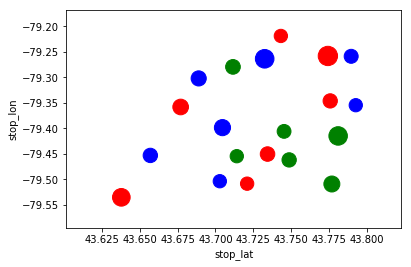

In [43]:
# Plot data using matplotlib
# Note the bigger the size, the more TTC running in that route
cm = plt.get_cmap('jet')
size = np.array(location["route_id"])
location.reset_index().plot.scatter(x = "stop_lat", y = "stop_lon", s= size/20, c=['red', 'blue', 'green'])

## Map the Routes

Using `folium` let's take closer look where are these stops located

`Answer`: *It is all located in Toronto!*

In [28]:
top20_map = folium.Map(location=[43.6532,-79.3832], zoom_start = 11)
for i in range(0,len(location)):
    folium.CircleMarker(
          location=[location.index[i][0], location.index[i][1]],
          radius = int(45 - (2*i)),
          color='crimson',
          fill=True,
    ).add_to(top20_map)
top20_map

# TTC Ridership Analysis

Let's take a closer look on how many people are using the transit system and find out:
- Who they are and which transit people take the most?
- When people are using the service the most?

## Who takes the transit? Which transit do people take the most?

Analysis of passengers and transit from 2008 to 2017

*Note that ridership results for 2015 exclude the Free Rides allowance for Pan Am & Parapan Am games.*

In [39]:
# Let's make sure we got all the sub-total for each category from the dataset
passenger = ridership_analysis[ridership_analysis['  FARE MEDIA'] == '  SUB-TOTAL']

In [40]:
# Drop 'FARE MEDIA' from the column then reset index
passenger = passenger.drop(columns=['  FARE MEDIA'], axis = 1)
passenger = passenger.reset_index()

# Drop 'Index' column since it produces NaN
passenger = passenger.drop(columns=['index'], axis = 1)

In [41]:
# Narrow down data from 1985-2017 to 2008-2017 by slicing the data using iloc
passenger = passenger.iloc[: , :10]

In [42]:
# Preview the modified dataset
passenger

2017      2016    2015 *      2014      2013      2012      2011  \
0  417608.0  426973.0  434889.0  437287.0  431142.0  419118.0  406594.0   
1   78044.0   73648.0   70967.0   69036.0   65059.0   65596.0   65200.0   
2   25019.0   21911.0   12541.0   10802.0   10271.0   10518.0   10737.0   
3  261113.0  252899.0  238943.0  245292.0  239968.0  234582.0  223269.0   
4  272103.0  285180.0  295062.0  289523.0  285226.0  279425.0  276950.0   

       2010      2009      2008  
0  386351.0  381848.0  378893.0  
1   62513.0   60346.0   59994.0  
2   10826.0   10972.0   11035.0  
3  219855.0  218545.0  215997.0  
4  257502.0  252688.0  250703.0

### Bar Plot the Results!

- Transpose data for plot clarity
- Set the new category for column name: *"ADULT", "SENIOR/STUDENT", "CHILDREN", "BUS", "RAIL"*
- Using matplotlib bar plot to plot the result

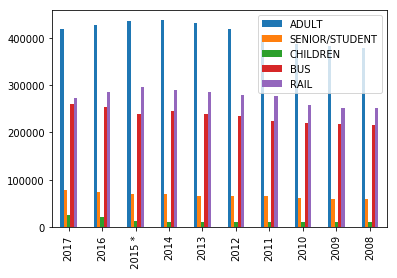

In [44]:
# Transpose Dataset
passenger = passenger.T

# Set column name (for categories letter in the plot)
passenger.columns = ["ADULT", "SENIOR/STUDENT", "CHILDREN", "BUS", "RAIL"]

# Bar plot the data using matplotlib
passenger.plot.bar()

## When do people use the transit the most?

Do those people take the transit during the `weekdays` for work? During Peak time? Non peak time?

Or maybe on the `weekend` just to visit various events happening in Toronto? 

### Weekdays Dataset Modification
- Filter ridership_analysis data that match week days
- Clean up dataset
- Transpose dataset, reset index, set new index
- Take data from 2008 to 2017

In [45]:
# Get the total number of people who take transit on weekdays
weekdays = ridership_analysis[ridership_analysis['  FARE MEDIA'] == 'WEEKDAY']

In [46]:
# Drop 'FARE MEDIA' column (clean up)
weekdays = weekdays.drop(columns=['  FARE MEDIA'], axis = 1)

# Transpose Data that later going to be useful for easiness in plotting
weekdays = weekdays.T

# Reset index and set 'index' as the new index
weekdays = weekdays.reset_index().set_index('index')

In [47]:
# Take data from 2008 to 2017
weekdays = weekdays.head(10)

# Preview data
weekdays

WHEN
index            
2017     424155.0
2016     424117.0
 2015 *  423808.0
2014     423269.0
2013     416297.0
2012     406913.0
2011     395578.0
2010     379810.0
2009     374908.0
2008     374765.0

#### Plot TTC Ridership on Weekdays 2008 -2017

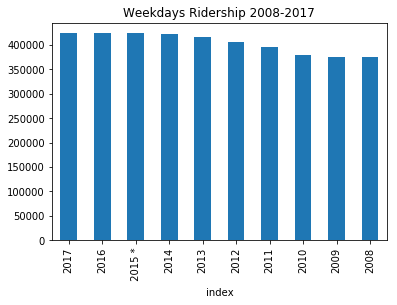

In [51]:
weekdays.plot.bar(legend=False, title="Weekdays Ridership 2008-2017")

### Weekend Dataset Modification
- Filter ridership_analysis data that match weekend
- Clean up dataset
- Transpose dataset, reset index, set new index
- Take data from 2008 to 2017

In [48]:
# Get total number of people who take transit on weekends
weekend = ridership_analysis[ridership_analysis['  FARE MEDIA'] == 'WEEKEND/HOLIDAY']

In [49]:
# Drop 'FARE MEDIA' column (clean up)
weekend = weekend.drop(columns=['  FARE MEDIA'], axis = 1)

# Transpose Data that later going to be useful for easiness in plotting
weekend = weekend.T

# Reset index and set 'index' as the new index
weekend = weekend.reset_index().set_index('index')

In [50]:
# Take data from 2008 to 2017
weekend = weekend.head(10)

# Preview data
weekend

NaN
index            
2017     109061.0
2016     113962.0
 2015 *  110197.0
2014     111546.0
2013     108897.0
2012     107094.0
2011     104641.0
2010      97547.0
2009      96325.0
2008      91935.0

#### Plot TTC Ridership on Weekend 2008 -2017

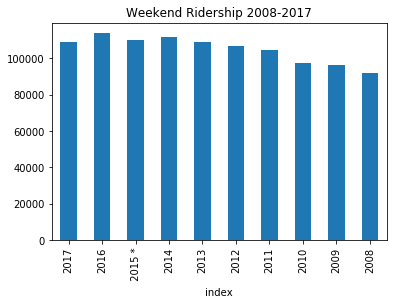

In [52]:
weekend.plot.bar(legend=False, title="Weekend Ridership 2008-2017")

## Overall weekdays vs weekend comparison

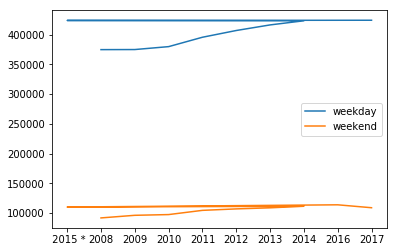

In [55]:
# Plot weekdays
plt.plot(weekdays, label = "weekday")

# Plot weekend
plt.plot(weekend, label = "weekend")

 # show plot legend
plt.legend()

## Analysis: Peak Time & Non-Peak Time Riders

### Peak Time

Is it increasing or decreasing?

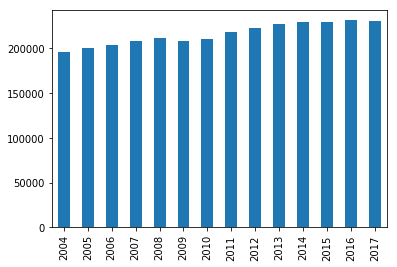

In [101]:
# Transpose Data
peak_passengers = peak_passengers.T

# Plot data using pandas
peak_passengers.plot.bar(legend = False)

### Non-Peak Time

Is it increasing or decreasing?

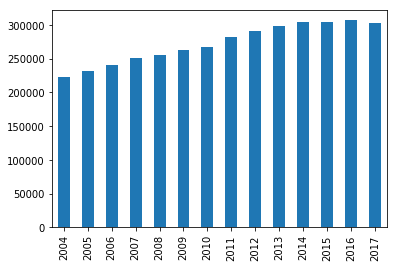

In [103]:
# Transpose data
non_peak_passengers = non_peak_passengers.T

# Plot data using pandas
non_peak_passengers.plot.bar(legend = False)

## Analysis: Average Weekday Ridership

How is it correlating over the months and years?

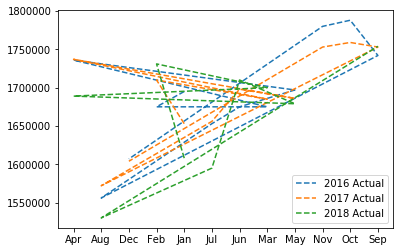

In [104]:
# Set 'Year' as index
average_weekday_ridership = average_weekday_ridership.set_index('Year')

# Plot how is it fluctuating depending on the months in the year
for i in range(len(average_weekday_ridership)):
    plt.plot(average_weekday_ridership.iloc[i], '--', label = average_weekday_ridership.index[i])
    plt.legend()

### Average Weekdays Ridership

**Let's do quick analysis over the yearly average**

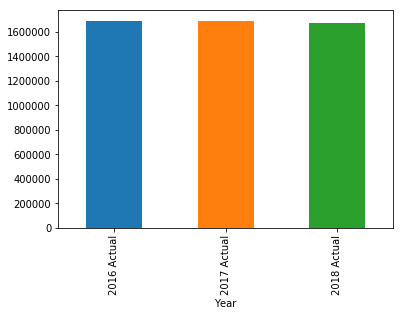

In [107]:
# Transpose Data
yearly_average = average_weekday_ridership.T

# Aggregate mean of the data
yearly_average = yearly_average.agg(np.mean)

# Plot the data
yearly_average.plot.bar(legend=False)

** How is the correlation of the mean over the years? **

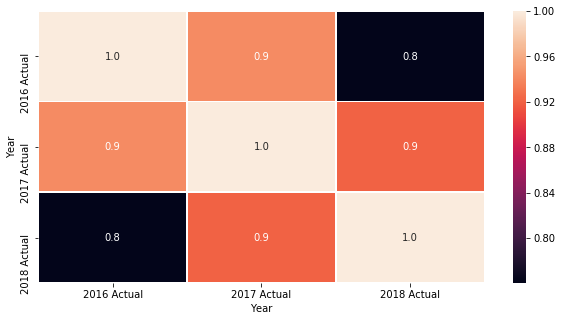

In [109]:
yearly_average = average_weekday_ridership.T
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(yearly_average.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

## Which Route do People Take the Most?

Based on 2016 ranking data

### Clean up the dataset

Read in spreadsheet format, need some cleanup

In [75]:
# Raw data preview
ranking_2016.head()

Unnamed: 0 Unnamed: 1     Unnamed: 2 Unnamed: 3 Unnamed: 4
0       Rank    Route #     Route Name  Ridership        NaN
1          1        504           King      64579        NaN
2          2         32  Eglinton West      48684        NaN
3          3         36     Finch West      43952        NaN
4          4         52  Lawrence West      43882        NaN

In [76]:
# Take the first row of the dataset
new_header = ranking_2016.iloc[0]

# Reset data starting from second row onwards
ranking_2016 = ranking_2016[1:]

# Set the first row as the column header
ranking_2016.columns = new_header

# Slice the last column out since it only contain NaN and has no useful data for this analysis
ranking_2016 = ranking_2016.iloc[:, :5]

In [77]:
# Convert 'Ridership' Column from string to int
ranking_2016.Ridership = pd.to_numeric(ranking_2016.Ridership, errors='coerce').fillna(0).astype(np.int64)

# Sort dataset based on 'Ridership' values descending then reset index
ranking_2016 = pd.DataFrame(ranking_2016).sort_values(by = "Ridership", ascending = False).reset_index()

In [78]:
# Make sure it's not taking 'NaN' since it's not specifying which routes
ranking_2016 = ranking_2016.iloc[1:, :]

# Take top 20 routes
ranking_2016 = ranking_2016.head(20)

# Preview data
ranking_2016

0   index Rank Route #     Route Name  Ridership  NaN
1       1    1     504           King      64579  NaN
2       2    2      32  Eglinton West      48684  NaN
3       3    3      36     Finch West      43952  NaN
4       4    4      52  Lawrence West      43882  NaN
5       5    5     510        Spadina      43804  NaN
6       6    6     501          Queen      43464  NaN
7       7    7      29       Dufferin      39721  NaN
8       8    8     506        Carlton      39601  NaN
9      21   21      25      Don Mills      39066  NaN
10      9    9     512      St. Clair      38113  NaN
11     10   10      54  Lawrence East      36277  NaN
12     11   11      35           Jane      32479  NaN
13     12   12     505         Dundas      32410  NaN
14     13   13      60   Steeles West      29819  NaN
15     14   14      34  Eglinton East      29501  NaN
16     15   15      53   Steeles East      28278  NaN
17     16   16      95     York Mills      27485  NaN
18     17   17      85  Sheppard East      27146  NaN
19     18   18      24  Victoria Park      26869  NaN
20     19   19       7       Bathurst      26251  NaN

### Map the Routes

Using `folium` let's take closer look where are these routes in Toronto

#### Find what is latitude and longitude for each of this route

In [86]:
# Find full dataset from original merged data where route number match all top 20 route in 2016
route_rank = route_trip_stop[route_trip_stop.route_short_name.isin([ranking_2016['Route #'][i] for i in range (1,len(ranking_2016))])]

In [89]:
# Group by the longitude and latitude
route_rank = route_rank.groupby(['stop_lat', 'stop_lon']).count()

# For map plotting purposes
temp = route_rank.index

# Preview data
route_rank.head()

route_id  route_short_name  route_long_name  route_type  \
stop_lat  stop_lon                                                              
43.591664 -79.544173         1                 1                1           1   
43.591810 -79.544124         1                 1                1           1   
43.593354 -79.538224         1                 1                1           1   
43.593490 -79.537983         1                 1                1           1   
43.594317 -79.534096         1                 1                1           1   

                      trip_id  trip_headsign  wheelchair_accessible  \
stop_lat  stop_lon                                                    
43.591664 -79.544173        1              1                      1   
43.591810 -79.544124        1              1                      1   
43.593354 -79.538224        1              1                      1   
43.593490 -79.537983        1              1                      1   
43.594317 -79.534096        1              1                      1   

                      arrival_time  departure_time  stop_id  stop_sequence  \
stop_lat  stop_lon                                                           
43.591664 -79.544173             1               1        1              1   
43.591810 -79.544124             1               1        1              1   
43.593354 -79.538224             1               1        1              1   
43.593490 -79.537983             1               1        1              1   
43.594317 -79.534096             1               1        1              1   

                      stop_code  stop_name  
stop_lat  stop_lon                          
43.591664 -79.544173          1          1  
43.591810 -79.544124          1          1  
43.593354 -79.538224          1          1  
43.593490 -79.537983          1          1  
43.594317 -79.534096          1          1

In [91]:
# Plot route stops using Folium
m2 = folium.Map(location=[43.6532,-79.3832], zoom_start = 11)
for i in range(0,len(temp)):
    folium.CircleMarker(
          location=[route_rank.index[i][0], route_rank.index[i][1]],
          radius=10,
          color='blue',
          fill=True,
    ).add_to(m2)

In [117]:
# Preview the map
m2

### Analysis: Are the frequent transits covering the popular routes taken by people?

In [95]:
m3 = folium.Map(location=[43.6532,-79.3832], zoom_start = 10.5)

# Add all the popular route stop from 2016
for i in range(0,len(temp)):
    folium.CircleMarker(
          location=[route_rank.index[i][0], route_rank.index[i][1]],
          radius=10,
          color='blue',
          fill=True,
    ).add_to(m3)
    
# Add all top 20 TTC routes
for i in range(0,len(location)):
    folium.CircleMarker(
          location=[location.index[i][0], location.index[i][1]],
          radius = int(45 - (2*i)),
          color='crimson',
          fill=True,
    ).add_to(m3)
    
    
# Preview the map
m3

## TTC Delay

Analysis of TTC delay over the years and in the most recent year of 2018

### Analysis TTC Subway delay 2014 to 2017

How long is the total delay and what cause the delay the most?

`Note: The code will be explained in the analysis document`

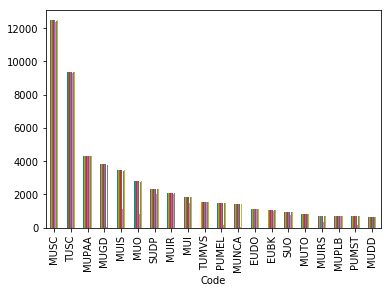

In [112]:
# Group by incident code
incident = subway_delay_14_to_17.groupby(['Code']).count()

# Sort by the the longest delay
incident = pd.DataFrame(incident).sort_values(by = "Min Delay", ascending = False)

# Take top 20 incidents
incident = incident.head(20)

# Plot top 20 incidents
incident.plot.bar(legend=False)

## Overview: TTC Delay in 2018

In [113]:
# Merge summary of subway and streetcar delay
delay = subway_delay.merge(streetcar_delay, on = "Time")

In [114]:
# Merge summary of subway + streetcar delay and bus delay
delay = delay.merge(bus_delay, on = "Time")

In [115]:
# Set Time as index
delay = delay.set_index("Time")

# Set column names
delay.columns = ["subway", "streetcar", "bus"]

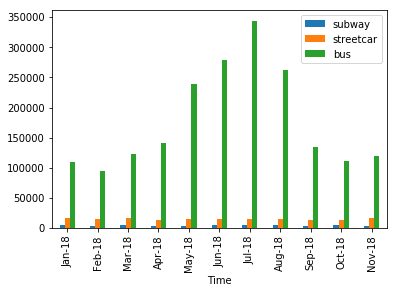

In [116]:
# Plot to compare which TTC service experience the most in 2018
delay.plot.bar()